In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from catboost import CatBoostRegressor

from tmpnn import Regression, regularizers as reg


# Sin

In [2]:
x_test = np.linspace(-20,20,5000,True).reshape(-1,1)
y_test = np.sin(x_test)
yt_test = np.cos(x_test)
x = np.linspace(-7,7,100,True).reshape(-1,1)
y = np.sin(x)
yt = np.cos(x)

/Users/samedi/Documents/Coding/tmpnn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+00, tolerance: 4.645e-03
  model = cd_fast.enet_coordinate_descent(


(-2.0, 2.0)

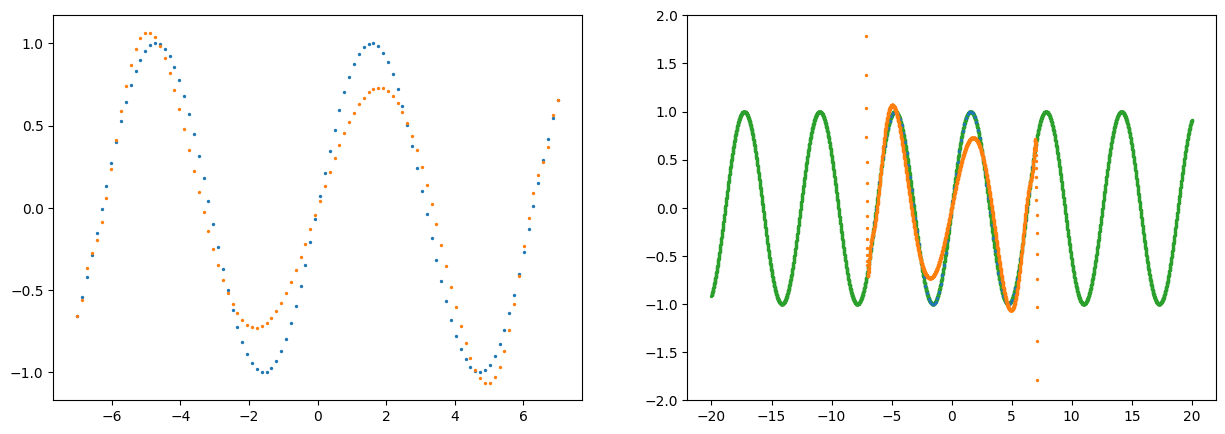

In [20]:
poly_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                            ('preprocessor', PolynomialFeatures(degree=125, include_bias=False)),
                            ('estimator', Lasso(alpha=0.0001))
                           ])

poly_pipe.fit(x, y)
y_pred = poly_pipe.predict(x)
y_test_pred = poly_pipe.predict(x_test)

_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(x, y, s=2)
axs[0].scatter(x, y_pred, s=2)
axs[1].scatter(x_test, y_test, s=2, c='tab:green')
axs[1].scatter(x, y, s=2, c='tab:blue')
axs[1].scatter(x_test, y_test_pred, s=2, c='tab:orange')
axs[1].set_ylim(-2,2)


In [3]:
model = Regression(num_features=1, num_targets=2, order=3, steps=10)
model.fit(x, np.column_stack([y,yt]), epochs=100, verbose=1)
model.set_learning_rate(0.5e-4)
model.fit(x, np.column_stack([y,yt]), epochs=500, verbose=1)
ytm_pred = model.predict(x)
ytm_test_pred = model.predict(x_test)

model.pnn.get_weights()

Epoch 1/100
1/1 [==============================] - 1s 870ms/step - loss: 0.4301
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3585
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3065
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2682
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2400
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2047
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1941
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1866
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1813
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1775
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 13/100
1/1 [==============================] - 0s 2ms/

[array([[0.00332479, 0.05291167, 0.0486001 ]], dtype=float32),
 array([[ 1.0006318e+00,  8.0837432e-04,  1.0131248e-04],
        [-2.3588927e-07,  1.0053679e+00,  4.1500749e-03],
        [ 2.0172234e-07,  4.3343604e-03,  1.0042933e+00]], dtype=float32),
 array([[ 1.1303519e-03, -6.3697225e-03,  4.6417131e-03],
        [ 2.1793062e-07, -6.7259505e-04, -1.5833626e-03],
        [ 2.7154243e-07, -1.5149182e-03, -6.8187388e-04],
        [ 2.1793062e-07, -6.7259505e-04, -1.5833626e-03],
        [-2.4755411e-07,  2.9884616e-04,  4.0782641e-07],
        [ 2.8256738e-07,  5.2486229e-07, -4.3538137e-08],
        [ 2.7154243e-07, -1.5149182e-03, -6.8187388e-04],
        [ 2.8256738e-07,  5.2486229e-07, -4.3538137e-08],
        [-3.7537117e-07,  4.3986023e-07,  7.9455904e-06]], dtype=float32),
 array([[ 1.7631304e-03, -7.7381250e-03,  9.9266991e-03],
        [ 3.3594532e-07, -1.6327283e-03, -8.1538798e-05],
        [-1.7616091e-07, -2.4292446e-03,  7.5513600e-07],
        [ 3.3594532e-07, -1.63272

(-2.0, 2.0)

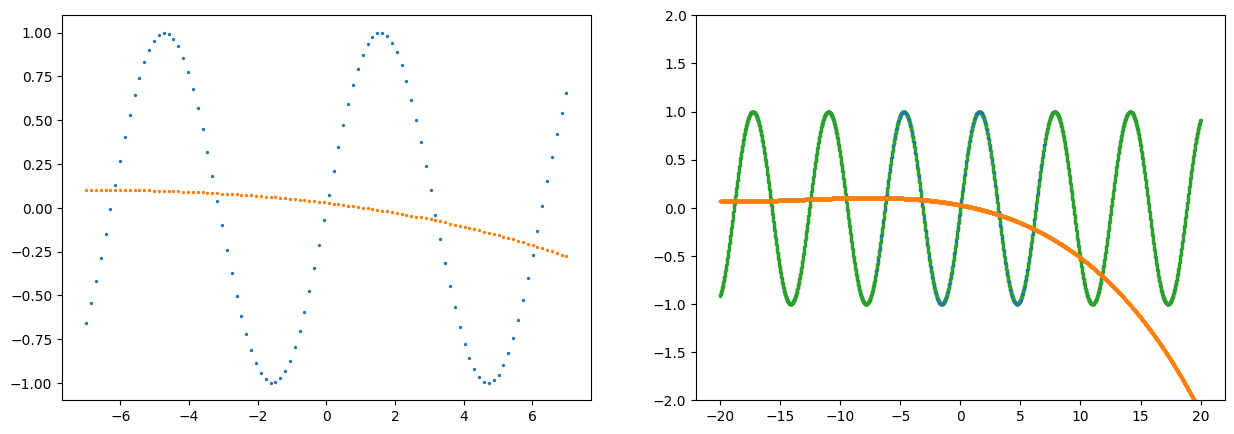

In [4]:
_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(x, y, s=2)
axs[0].scatter(x, ytm_pred[:,0], s=2)
axs[1].scatter(x_test, y_test, s=2, c='tab:green')
axs[1].scatter(x, y, s=2, c='tab:blue')
axs[1].scatter(x_test, ytm_test_pred[:,0], s=2, c='tab:orange')
axs[1].set_ylim(-2,2)

  1/157 [..............................] - ETA: 2s

157/157 [==============================] - 0s 833us/step


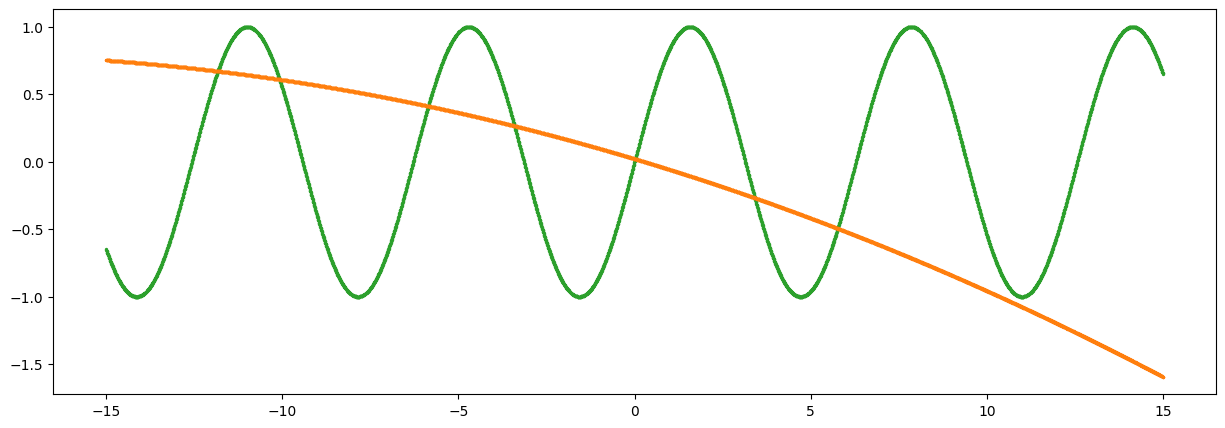

In [46]:
ytm_test_pred = model.predict(x_test)
plt.figure(figsize=(15,5))
plt.scatter(x_test, y_test, s=2, c='tab:green')
plt.scatter(x_test, ytm_test_pred[:,0], s=2, c='tab:orange')
# plt.ylim(-2,2)

# Lennard-Jones

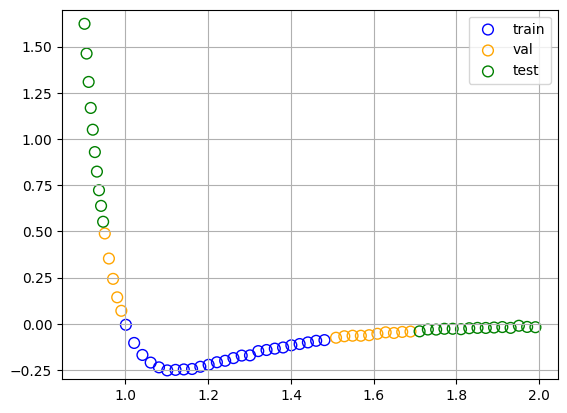

In [2]:
x = np.arange(0.9,2,0.001)
def f(x):
    return x**(-12)-x**(-6)
y = f(x) + np.random.normal(0,0.003,x.shape)
m_tr = (x<1.5)&(x>1.00)
m_vl = (x<1.7)&(x>0.95)&~m_tr
m_ts = (x<2.0)&(x>0.90)&~m_tr&~m_vl
x_tr, y_tr = x[m_tr].reshape(-1, 1), y[m_tr]
x_vl, y_vl = x[m_vl].reshape(-1, 1), y[m_vl]
x_ts, y_ts = x[m_ts].reshape(-1, 1), y[m_ts]
x = x.reshape(-1, 1)

def plot():
    plt.grid(True)
    plt.ylim(-0.3,1.7)
    plt.scatter(x_tr[::20], y_tr[::20], s=60, facecolors='none', edgecolors='b', label='train')
    plt.scatter(x_vl[:50:10], y_vl[:50:10], s=60, facecolors='none', edgecolors='orange', label='val')
    plt.scatter(x_vl[60::20], y_vl[60::20], s=60, facecolors='none', edgecolors='orange')
    plt.scatter(x_ts[:50:5], y_ts[:50:5], s=60, facecolors='none', edgecolors='g', label='test')
    plt.scatter(x_ts[60::20], y_ts[60::20], s=60, facecolors='none', edgecolors='g')
plot()
plt.legend()
plt.show()

In [3]:
def score(model):
    print('R2 (train)', r2(y_tr,model.predict(x_tr)))
    print('R2 (val)  ', r2(y_vl,model.predict(x_vl)))
    print('R2 (test) ', r2(y_ts,model.predict(x_ts)))

35/35 [==============================] - 0s 613us/step
0.003030161295912759


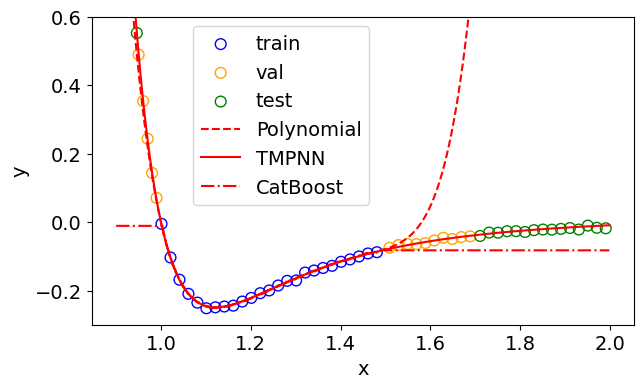

In [13]:
plt.figure(figsize=(7,4))
font = {'size'   : 14}
matplotlib.rc('font', **font)

plot()
plt.grid(False)

model = Pipeline(steps=[
    ('p', PolynomialFeatures(6)),
    ('m', LinearRegression())
])
model.fit(x_tr, y_tr)
pred = model.predict(x)
plt.plot(x,pred,label='Polynomial',linestyle='--',c='r')

model = Regression(1,1,2,7)
model.fit(x_tr, y_tr, verbose=0, epochs=10000)
pred = model.predict(x)
plt.plot(x,pred,label='TMPNN',c='r')
print(mae(y,pred))

model = CatBoostRegressor()
model.fit(x_tr, y_tr, eval_set=(x_vl,y_vl),verbose=0)
pred = model.predict(x)
plt.plot(x,pred,label='CatBoost',linestyle='-.',c='r')

plt.legend(loc='upper center',bbox_to_anchor=(0.35, 1))
plt.ylim(-0.3,0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

35/35 [==============================] - 0s 402us/step
0.0039451640899119365


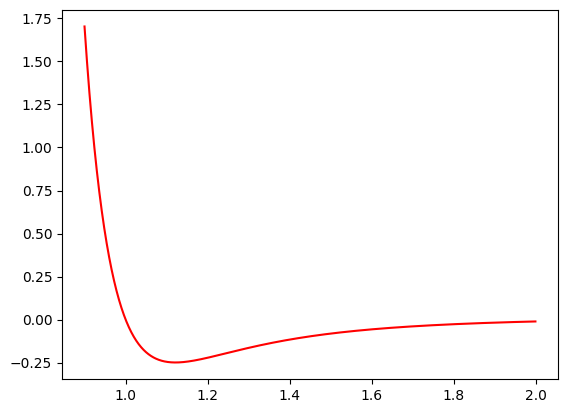

In [143]:
model = Regression(1,1,2,7)
model.fit(x_tr, y_tr, verbose=0, epochs=10000)
pred = model.predict(x)
plt.plot(x,pred,label='TMPNN(2,7)',c='r')
print(mae(y,pred))

197/197 [==============================] - 0s 328us/step
0.07257781993704465


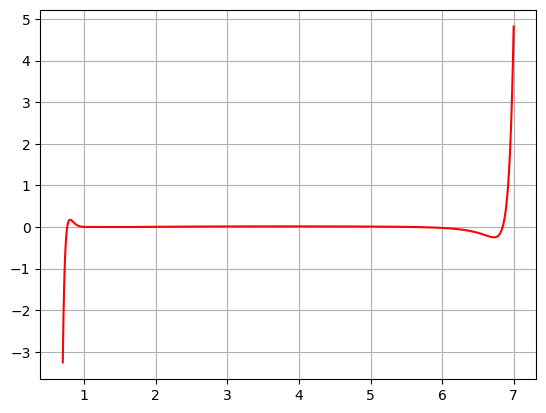

In [157]:
nx = np.arange(0.7,7,0.001).reshape(-1,1)
pred = model.predict(nx)
plt.plot(nx,pred-f(nx),label='TMPNN(2,7)',c='r')
print(mae(f(nx),pred))
plt.grid(True)
plt.show()

In [160]:
D = [i for i in range(1,20)]
R_tr = []
R_vl = []
R_ts = []
for d in D:
    model = Regression(1,1,3,d)
    model.fit(x_tr, y_tr, verbose=0, epochs=2000*d//2)
    R_tr.append(mae(y_tr,model.predict(x_tr)))
    R_vl.append(mae(y_vl,model.predict(x_vl)))
    R_ts.append(mae(y_ts,model.predict(x_ts)))

11/11 [==============================] - 0s 723us/step


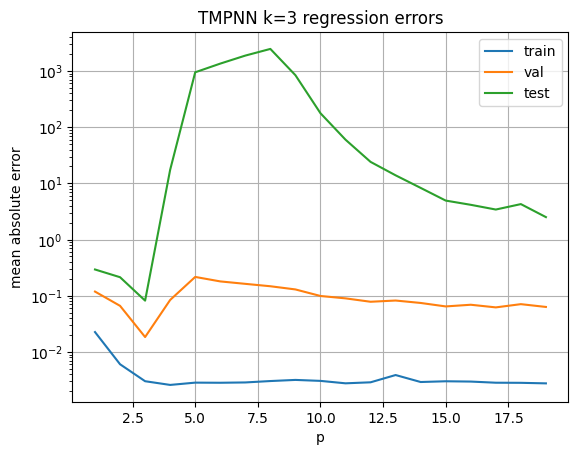

In [161]:
plt.yscale('log')
plt.yticks()
plt.grid(True)
plt.plot(D, R_tr, label='train')
plt.plot(D, R_vl, label='val')
plt.plot(D, R_ts, label='test')
plt.xlabel("p")
plt.ylabel("mean absolute error")
plt.title('TMPNN k=3 regression errors')
plt.legend()
plt.show()

16/16 [==============================] - 0s 390us/step
R2 (train) 0.9967497032224376
8/8 [==============================] - 0s 455us/step
R2 (val)   0.9965231038725185
11/11 [==============================] - 0s 442us/step
R2 (test)  0.9965304577579592


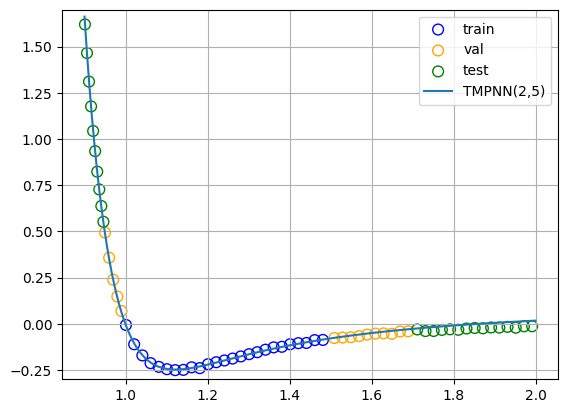

In [87]:
model = Regression(1,1,2,5)
history = model.fit(x_tr, y_tr, verbose=0, epochs=1080)
pred = model.predict(x)
plot()
plt.plot(x,pred,label='TMPNN(2,5)')
plt.legend()
score(model)
plt.show()

# Regularizations

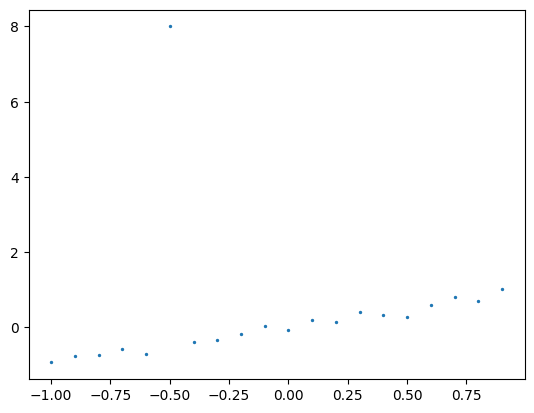

In [2]:
x = np.arange(-1,1,0.1).reshape(-1,1)
y = x + np.random.normal(0,0.1,x.shape)
y[5]=8
plt.scatter(x,y,s=2)
plt.show()

1/1 [==============================] - 0s 65ms/step


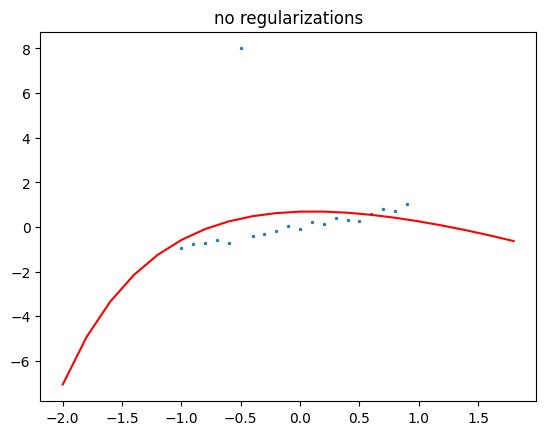

In [45]:
model = Regression(1,1)
model.fit(x,y,verbose=0,epochs=200)
plt.scatter(x,y,s=2)
plt.plot(x*2,model.predict(x*2),c='r')
plt.title('no regularizations')
plt.show()

1/1 [==============================] - 0s 89ms/step


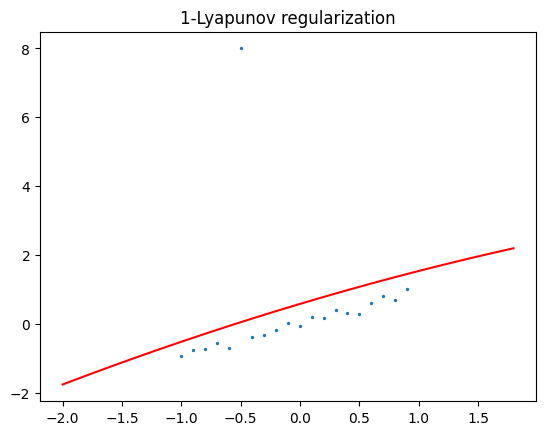

In [44]:
model = Regression(1,1,regularizer=reg.Lyapunov1(2))
model.fit(x,y,verbose=0,epochs=200)
plt.scatter(x,y,s=2)
plt.plot(x*2,model.predict(x*2),c='r')
plt.title('1-Lyapunov regularization')
plt.show()

1/1 [==============================] - 0s 148ms/step


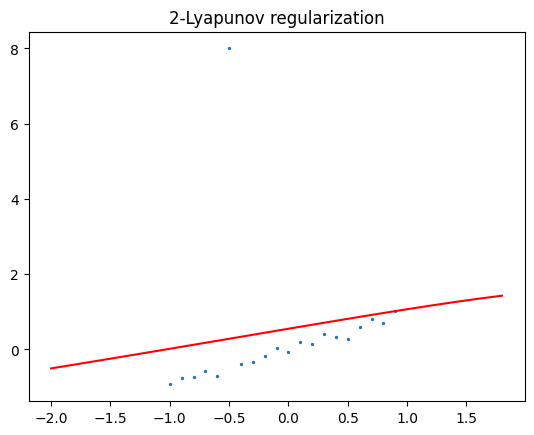

In [46]:
model = Regression(1,1,regularizer=reg.Lyapunov2(0.004))
model.fit(x,y,verbose=0,epochs=200)
plt.scatter(x,y,s=2)
plt.plot(x*2,model.predict(x*2),c='r')
plt.title('2-Lyapunov regularization')
plt.show()

1/1 [==============================] - 0s 115ms/step


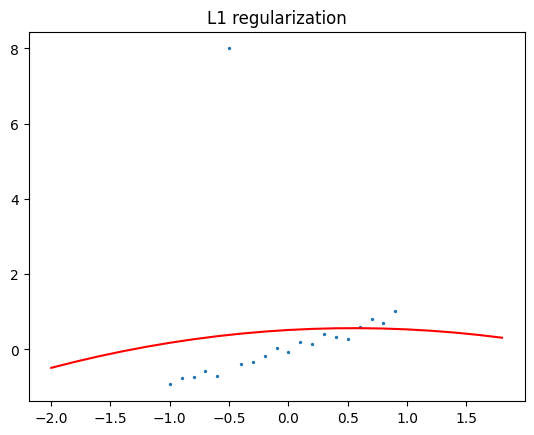

In [47]:
model = Regression(1,1,regularizer=reg.L1(0.004))
model.fit(x,y,verbose=0,epochs=200)
plt.scatter(x,y,s=2)
plt.plot(x*2,model.predict(x*2),c='r')
plt.title('L1 regularization')
plt.show()

1/1 [==============================] - 0s 107ms/step


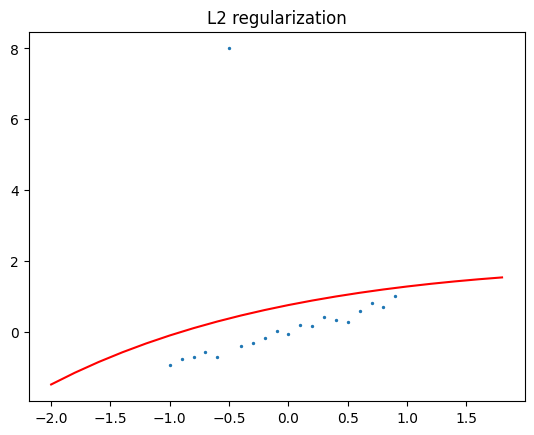

In [48]:
model = Regression(1,1,regularizer=reg.L2(0.02))
model.fit(x,y,verbose=0,epochs=200)
plt.scatter(x,y,s=2)
plt.plot(x*2,model.predict(x*2),c='r')
plt.title('L2 regularization')
plt.show()